In [81]:
import numpy as np
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


In [82]:
# Read original runoff_maps.nc to dataset
#data_dir = '/perm/nk0j/ece3data'
#runoff_file = f'{data_dir}/runoff-mapper/runoff_maps.nc'

# For creating same mask as standard (WIDE) runoff masks in EC-Earth3:
#data_dir = '/perm/nk0j/ecearth3-cmip6/runtime/classic/fwf/interactive/input'
#fwf_file = f'{data_dir}/FWF_LRF_y1850.nc'

depth = 700

#Create zshelf file based on basal melt mask
bm_file = './ncfiles/basal_melt_mask_ORCA1_ocean.nc'

print(bm_file)
ds = xr.open_dataset(bm_file)
ds

./ncfiles/basal_melt_mask_ORCA1_ocean.nc


<xarray.Dataset>
Dimensions:          (j: 292, i: 362)
Coordinates:
    longitude        (j, i) float64 ...
    latitude         (j, i) float64 ...
  * i                (i) float64 1.0 2.0 3.0 4.0 5.0 ... 359.0 360.0 361.0 362.0
  * j                (j) float64 1.0 2.0 3.0 4.0 5.0 ... 289.0 290.0 291.0 292.0
Data variables:
    basal_melt_mask  (j, i) float64 ...

In [83]:
# Select basal melt
#ds_new = ds.sorunoff_f.isel(time_counter=0)
ds_new = ds.basal_melt_mask
ds_new.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
ds_zshelf = ds_new.where(ds_new > 0)
ds_zshelf


<xarray.DataArray 'basal_melt_mask' (j: 292, i: 362)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    longitude  (j, i) float64 72.5 73.5 74.5 75.5 ... 73.05 73.04 73.0 72.99
    latitude   (j, i) float64 -78.39 -78.39 -78.39 -78.39 ... 50.23 50.01 50.01
  * i          (i) float64 1.0 2.0 3.0 4.0 5.0 ... 358.0 359.0 360.0 361.0 362.0
  * j          (j) float64 1.0 2.0 3.0 4.0 5.0 ... 288.0 289.0 290.0 291.0 292.0

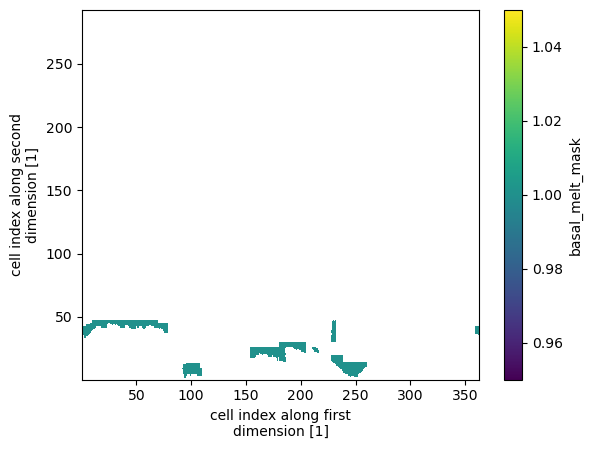

In [85]:
ds_zshelf.plot.pcolormesh()

In [86]:
ds_zshelf.name = 'zshelf'
ds_zshelf

<xarray.DataArray 'zshelf' (j: 292, i: 362)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    longitude  (j, i) float64 72.5 73.5 74.5 75.5 ... 73.05 73.04 73.0 72.99
    latitude   (j, i) float64 -78.39 -78.39 -78.39 -78.39 ... 50.23 50.01 50.01
  * i          (i) float64 1.0 2.0 3.0 4.0 5.0 ... 358.0 359.0 360.0 361.0 362.0
  * j          (j) float64 1.0 2.0 3.0 4.0 5.0 ... 288.0 289.0 290.0 291.0 292.0

In [87]:
ds_zshelf = ds_zshelf.fillna(0)


In [88]:
df_zshelf = ds_zshelf.values
df_zshelf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
df_zshelf[df_zshelf>0] = depth
df_zshelf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
df_zshelf.max()

700.0

In [91]:
ds_zshelf.max()

<xarray.DataArray 'zshelf' ()>
array(700.)

In [92]:
ds_zshelf.attrs = {'long_name':'basal melt depth', 'units':'m'}
ds_zshelf
# final file

<xarray.DataArray 'zshelf' (j: 292, i: 362)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
    longitude  (j, i) float64 72.5 73.5 74.5 75.5 ... 73.05 73.04 73.0 72.99
    latitude   (j, i) float64 -78.39 -78.39 -78.39 -78.39 ... 50.23 50.01 50.01
  * i          (i) float64 1.0 2.0 3.0 4.0 5.0 ... 358.0 359.0 360.0 361.0 362.0
  * j          (j) float64 1.0 2.0 3.0 4.0 5.0 ... 288.0 289.0 290.0 291.0 292.0
Attributes:
    long_name:  basal melt depth
    units:      m

In [93]:
ds_zshelf = ds_zshelf.expand_dims({'time_counter': 1})
ds_zshelf

<xarray.DataArray 'zshelf' (time_counter: 1, j: 292, i: 362)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
    longitude  (j, i) float64 72.5 73.5 74.5 75.5 ... 73.05 73.04 73.0 72.99
    latitude   (j, i) float64 -78.39 -78.39 -78.39 -78.39 ... 50.23 50.01 50.01
  * i          (i) float64 1.0 2.0 3.0 4.0 5.0 ... 358.0 359.0 360.0 361.0 362.0
  * j          (j) float64 1.0 2.0 3.0 4.0 5.0 ... 288.0 289.0 290.0 291.0 292.0
Dimensions without coordinates: time_counter
Attributes:
    long_name:  basal melt depth
    units:      m

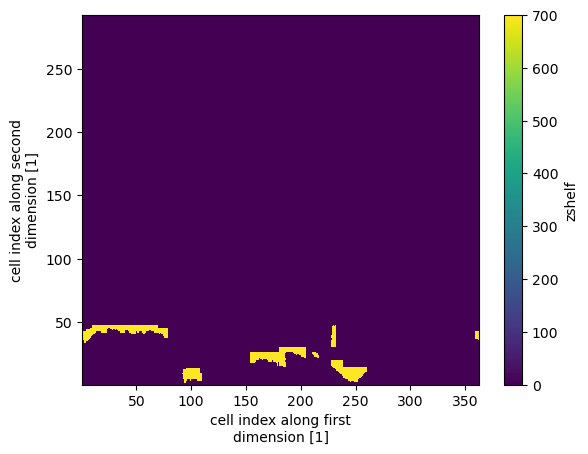

In [94]:
ds_zshelf.mean('time_counter').plot.pcolormesh()

In [95]:
#ds_zshelf.to_netcdf('zshelf_wide.nc', unlimited_dims=['time_counter'])
ds_zshelf.to_netcdf(f'zshelf_{depth}m.nc', unlimited_dims=['time_counter'])

In [83]:
runoff_depth_file = f'./inputfiles_Erwin/runoff_depth.nc'
print(runoff_depth_file)
ds_runoff_depth = xr.open_dataset(runoff_depth_file)
ds_runoff_depth


./inputfiles_Erwin/runoff_depth.nc


<xarray.Dataset>
Dimensions:       (y: 292, x: 362, z: 75, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    rodepth       (t, y, x) float64 ...
Attributes:
    file_name:    runoff_depth.nc
    TimeStamp:    18/11/2016 10:21:48 +0100
    ece-comment:  Created (ln_rnf_depth_ini=T) from SHACONEMO INPUTS_ORCA1_LI...
    ece-origin:   UFla (SMHI) for EC-Earth

<xarray.DataArray 'time_counter' (t: 1)>
[1 values with dtype=float64]
Dimensions without coordinates: t

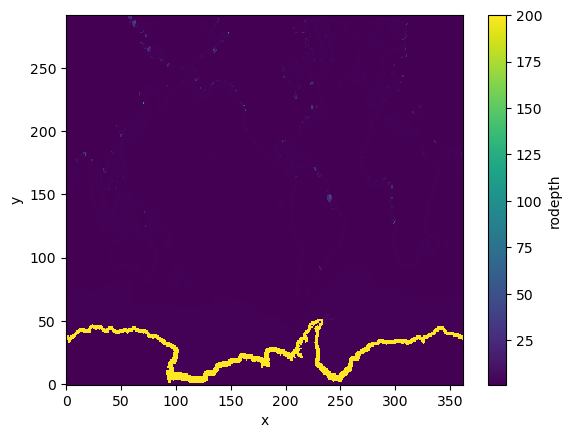

In [84]:

ds_runoff_depth.rodepth[0,:,:].plot.pcolormesh()
t = ds_runoff_depth.time_counter
t
#ds_zshelf.time_counter.values = 1.

In [89]:
mask = ds_runoff_depth.nav_lev.values > 200.

In [90]:
ds_runoff_depth.nav_lev.values[mask]

array([ 221.14117,  244.89062,  271.35638,  300.8875 ,  333.86282,
        370.68848,  411.79385,  457.6256 ,  508.6399 ,  565.2923 ,
        628.026  ,  697.25867,  773.3683 ,  856.67896,  947.4479 ,
       1045.8542 , 1151.9912 , 1265.8615 , 1387.377  , 1516.3636 ,
       1652.5685 , 1795.6708 , 1945.2955 , 2101.0266 , 2262.4216 ,
       2429.0251 , 2600.3804 , 2776.0393 , 2955.5703 , 3138.565  ,
       3324.6409 , 3513.4456 , 3704.6567 , 3897.982  , 4093.1587 ,
       4289.9526 , 4488.155  , 4687.581  , 4888.07   , 5089.4785 ,
       5291.683  , 5494.575  , 5698.0605 , 5902.0576 ], dtype=float32)

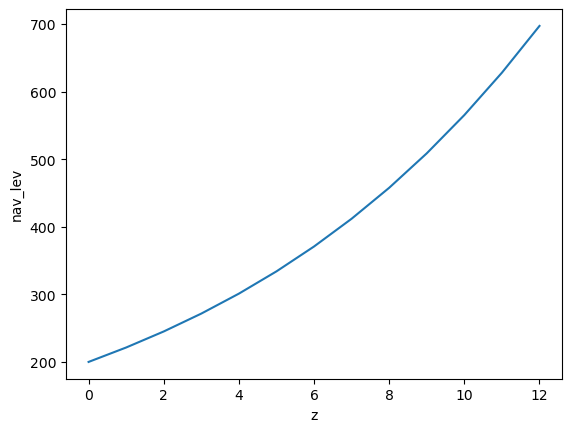

In [100]:
ds_runoff_depth.nav_lev[30:43].plot()
